# EDA for Haberman's Cancer Survival Dataset

#### Data Information
    The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

#### Attribute Information
1. Age of patient at time of operation (numerical)
2. Patient's year of operation (year - 1900, numerical)
3. Number of positive axillary nodes detected (numerical)
4. Survival status (class attribute)<br>
    1 = the patient survived 5 years or longer<br>
    2 = the patient died within 5 year

#### Objective
    Predict 'Survival Status' of a new patient as one of the two class attribute based on the three given features of the patient.

In [186]:
# Import the required libraries

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from statsmodels import robust
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

## Setting up the data

In [170]:
# Load 'haberman.csv' into Pandas DataFrame

haberman = pd.read_csv('haberman.csv')

print(haberman.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   age          306 non-null    int64
 1   op_year      306 non-null    int64
 2   nodes        306 non-null    int64
 3   surv_status  306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB
None


In [114]:
haberman

,age,op_year,nodes,surv_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
...,...,...,...,...
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1
304,78,65,1,2


In [34]:
# Number of data points of each class

haberman['surv_status'].value_counts()

1    225
2     81
Name: surv_status, dtype: int64

In [173]:
# Storing survived and died patients' data separately for easy access.

survived = haberman.loc[haberman['surv_status'] == 1]
died = haberman.loc[haberman['surv_status'] == 2]

### Observations
1. The dataset contains data of 306 patients.
2. It has survival data of 225 patients and 81 of died paitients.
3. Number of datapints of survival to death is in the approximate ratio of 3:1. We can consider it as nearly balanced dataset.

## Histograms and PDF

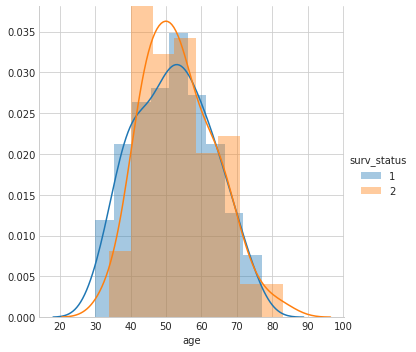

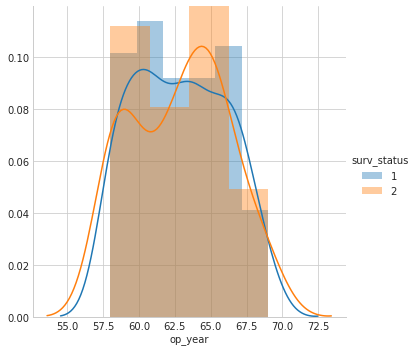

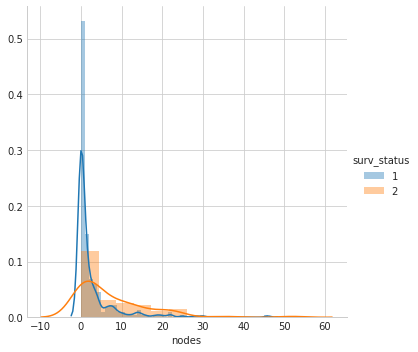

In [197]:
for index, feature in enumerate(list(haberman.columns)[:-1]):
    sns.FacetGrid(haberman, hue = 'surv_status', size = 5)\
        .map(sns.distplot, feature)\
        .add_legend();

### Observations

* From the histogram of nodes, it is evident that most of the survived patients had near to zero number of nodes. This gives us clear picture that survival might be inversely proportional to the number of nodes.
* The other two features(age and operating year) seem to be insignificant in predicting the survival status on standalone basis.

## Cumulative Distribution Function(CDF)


 age 



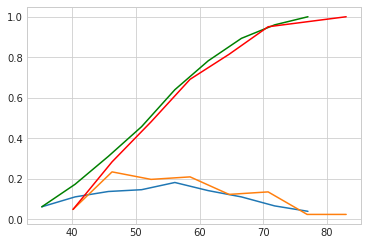


 op_year 



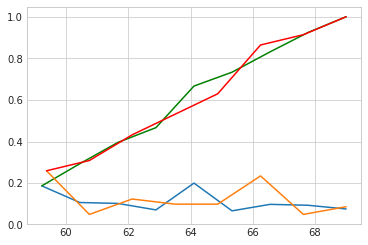


 nodes 



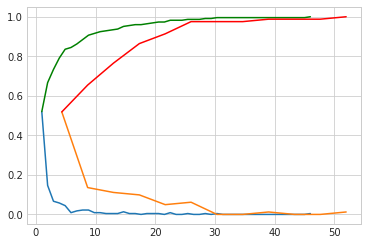

In [225]:
# Green and Blue colors denote survived patients
# Red and Orange colors denote died patients

for index, feature in enumerate(list(haberman.columns)[:-1]):
    
    #Survived
    
    counts, bin_edges = np.histogram(survived[feature], bins='auto', 
                                     density = True)
    pdf = counts/(sum(counts))
    cdf = np.cumsum(pdf)
    plt.plot(bin_edges[1:],pdf)
    plt.plot(bin_edges[1:], cdf,color='green')

    # Died
    counts, bin_edges = np.histogram(died[feature], bins='auto', 
                                     density = True)
    pdf = counts/(sum(counts))
    cdf = np.cumsum(pdf)
    plt.plot(bin_edges[1:],pdf)
    plt.plot(bin_edges[1:], cdf,color='red')

    
    print("\n",feature,"\n")
    plt.show();

#### Note : 
1. Green and Blue colors denote survived patients.
2. Red and Orange colors denote died patients.


### Observation

* Nodes - This seems to be the most important feature in classifying survival against death as all patients with  less than five nodes survived and they constitute for more than 80% of the total survivals. 
* Age - Although all the patients within age 40yrs survived, we can't generalize it as they constitute only ~18% of total survivals. Also all the patients after the age of 77yrs died but they constitute only a minor share of death percentage which is around ~5% of total deaths.


## Pair Plots

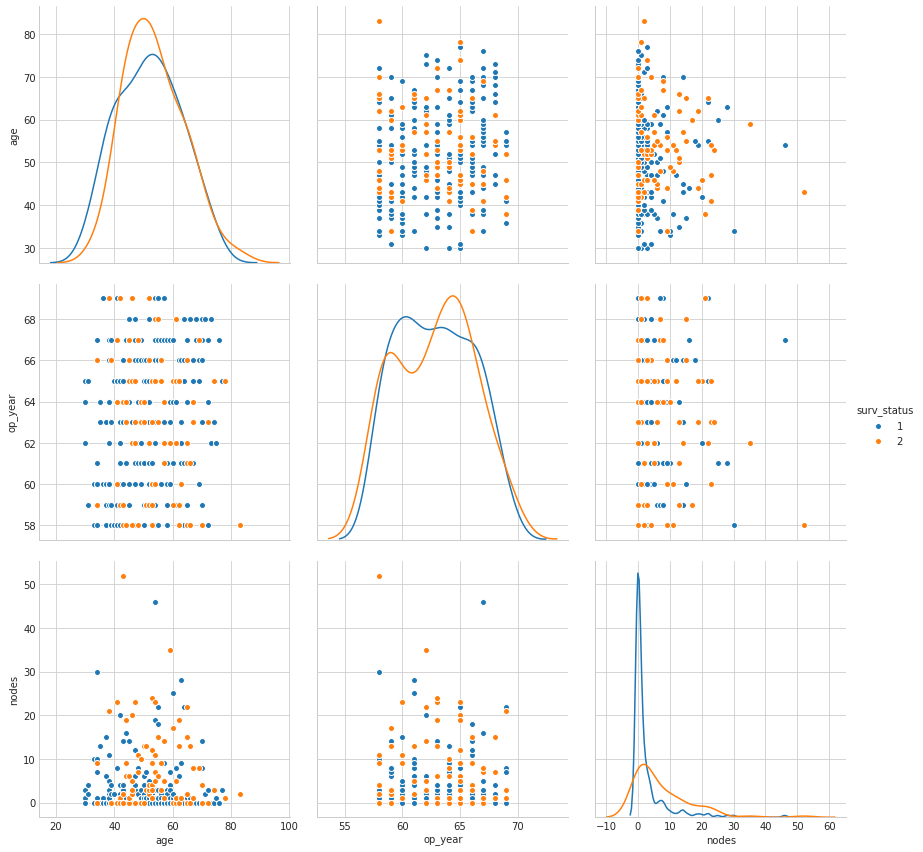

In [222]:
# 2D scatter plots of each feature against every feature

plt.close();
sns.set_style("whitegrid");
sns.pairplot(haberman, hue = 'surv_status', vars=["age", "op_year", "nodes"],size = 4, diag_kind="kde");
plt.show()

### Obsevations
* The histogram of Nodes gives us a picture that maximum survival cases lies around mean=0 which was already observed in the previous section. Else the other plots aren't much informative here.

## Mean and Std-Dev

In [227]:
#MEANS
print("\nMeans")
print("\nPatients who survived more than 5 yrs:")
print(np.mean(survived))
print("\nPatients who survived less than 5 yrs:")
print(np.mean(died))

#STD DEV
print("\n\nSTD DEV")
print("\nPatients who survived more than 5 yrs:")
print(np.std(survived))
print("\nPatients who survived less than 5 yrs:")
print(np.std(died))


Means

Patients who survived more than 5 yrs:
age            52.017778
op_year        62.862222
nodes           2.791111
surv_status     1.000000
dtype: float64

Patients who survived less than 5 yrs:
age            53.679012
op_year        62.827160
nodes           7.456790
surv_status     2.000000
dtype: float64


STD DEV

Patients who survived more than 5 yrs:
age            10.987655
op_year         3.215745
nodes           5.857258
surv_status     0.000000
dtype: float64

Patients who survived less than 5 yrs:
age            10.104182
op_year         3.321424
nodes           9.128776
surv_status     0.000000
dtype: float64


### Observations

* Mean of #nodes of survived patients is ~2.8 while that of died patients is ~7.4 which pushes us closer to deduce that probability is directly proportional to number of nodes.
* Also Standard Deviation of #nodes of survived patients is much less i.e. 5.86 against 9.12 of died patients signifying that #nodes are much concentrated near its mean for survived patients.

We shall dig deeper with the median data below.

## Median and its Derivatives

In [80]:
#MEDIAN
print("\nMEDIAN")
print("\nPatients who survived more than 5 yrs:")
print(survived.median())
print("\nPatients who survived less than 5 yrs:")
print(died.median())

#QUANTILES
print("\nQUANTILES of nodes:")
print("Survived:",np.percentile(survived['nodes'],np.arange(0, 100, 25)))
print("Died:",np.percentile(died['nodes'],np.arange(0, 100, 25)))

#90th Percentile
print("\n90th PERCENTILE:")
print("Survived:",np.percentile(survived['nodes'],90))
print("Died:",np.percentile(died['nodes'],90))

#MEDIAN ABSOLUTE DEVIATION
print ("\nMEDIAN ABSOLUTE DEVIATION:")
print("Survived:",robust.mad(survived["nodes"]))
print("Died:",robust.mad(died['nodes']))


MEDIAN

Patients who survived more than 5 yrs:
age            52.0
op_year        63.0
nodes           0.0
surv_status     1.0
dtype: float64

Patients who survived less than 5 yrs:
age            53.0
op_year        63.0
nodes           4.0
surv_status     2.0
dtype: float64

QUANTILES:
Survived: [0. 0. 0. 3.]
Died: [ 0.  1.  4. 11.]

90th PERCENTILE:
Survived: 8.0
Died: 20.0

MEDIAN ABSOLUTE DEVIATION:
Survived: 0.0
Died: 5.930408874022408


### Observations
1. Median of number of nodes of survived patients is 0 while of died patients is 4 which clearly indicates that less number of lymph nodes in the patient increases it's chance of survival.

2. Its worth noting the 3rd Quantile of #nodes of survived patients is still zero. This implies 50% of the patients who survived more than 5 years had zero lymph nodes while 2nd Quantile i.e 25% of died patients had one lymph node which extends to four in number on 75% range.

3. 90% of survived patients had 8 or less number of lymph nodes while the same 90% of died patients had as high as 20 lymph nodes.
4. MAD of #nodes of survived patients being zero along with median equals to zero finally concludes that most survived patients had zero lymph nodes.
5. MAD of #nodes of died patients is 5.93 with median 4 signals #nodes is scattered everywhere for died patients.
6. No significant pattern has been visible for other features i.e. age and operating year in predicting the survival status.

We will now see these conclusions diagramatically using box plots and violin plots.

# Box Plots and Violin Plots

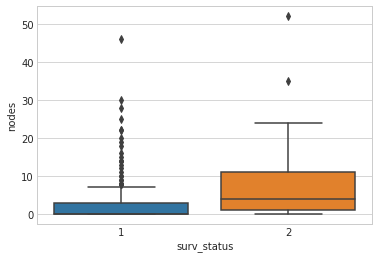

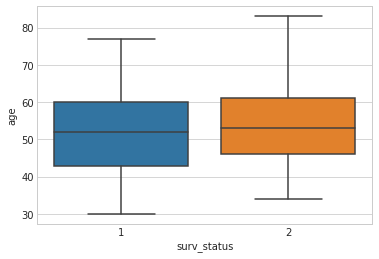

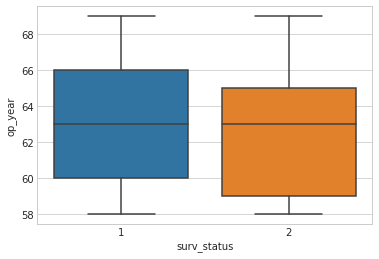

In [233]:
sns.boxplot(x='surv_status',y='nodes', data=haberman)
plt.show()

sns.boxplot(x='surv_status',y='age', data=haberman)
plt.show()

sns.boxplot(x='surv_status',y='op_year', data=haberman)
plt.show()

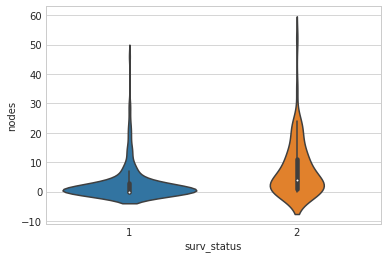

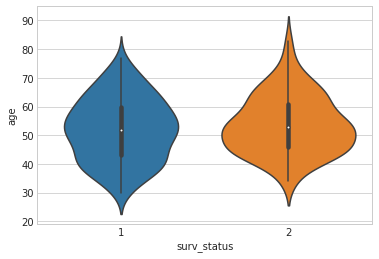

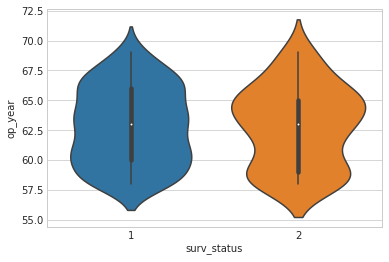

In [234]:
plt.close()
sns.violinplot(x='surv_status',y='nodes', data=haberman)
plt.show()

sns.violinplot(x='surv_status',y='age', data=haberman)
plt.show()

sns.violinplot(x='surv_status',y='op_year', data=haberman)
plt.show()

# Multivariate probability density, Contour plots

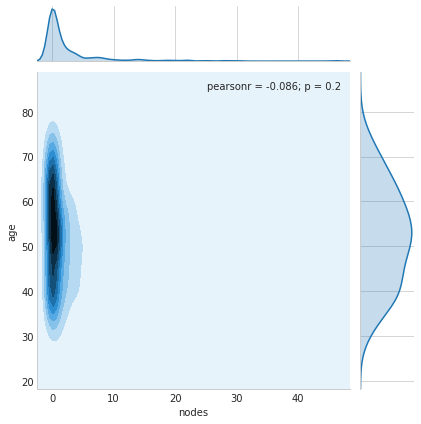

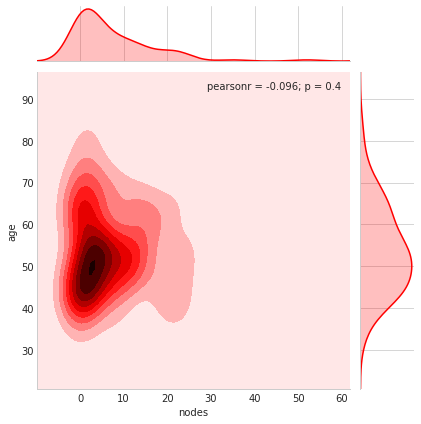

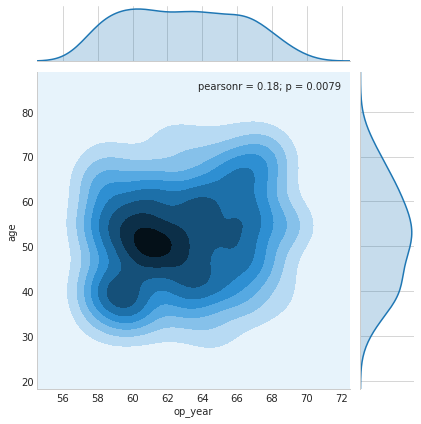

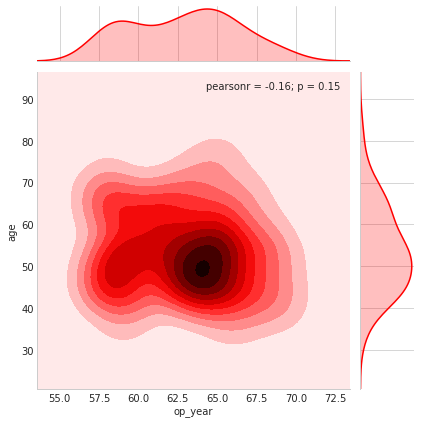

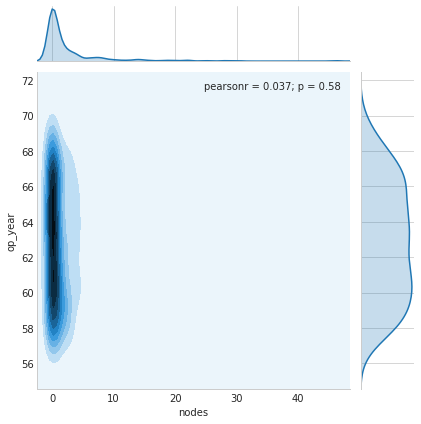

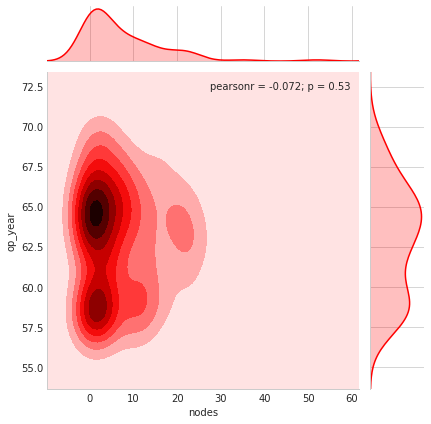

In [228]:
#Survived
sns.jointplot(x='nodes', y='age', data=survived, kind='kde')
sns.jointplot(x='nodes', y='age', data=died, kind='kde', color='r')
sns.jointplot(x='op_year', y='age', data=survived, kind='kde')
sns.jointplot(x='op_year', y='age', data=died, kind='kde', color='r')
sns.jointplot(x='nodes', y='op_year', data=survived, kind='kde')
sns.jointplot(x='nodes', y='op_year', data=died, kind='kde', color='r')
plt.show();

